# Task
Студент характеризується iменем i прiзвищем та iдентифiкацiйним но-<br>
мером studID. Данi студентiв знаходяться в окремому файлi.<br>

Результати виконання iндивiдуальних завдань знаходяться в кiлькох<br>
окремих файлах, назва яких має формат “taskXX”, де ХХ – двоцифровий<br>
номер завдання. Формат результатiв: studID , невiд’єне цiле число.<br>
Отримати засобами Pandas вказанi в завданнях данi i вiзуалiзувати їх :<br>

1. Побудувати загальний DataFrame з колонками<br>
’Student’, ’Task01’,’Task02’,’Task03’, ...,’Task0N’.<br>
1а. Для колонки, назва якої вибрана з випадаючого списку, отримати<br>
рейтинг студентiв.<br>
1б. Для колонки, назва якої вибрана з випадаючого списку, побудувати<br>
дiаграму результатiв.<br>
1в. Для колонки, назва якої вибрана з випадаючого списку, отримати<br>
середнє значення результатiв.<br>

2. Додати до датафрейму колонку ’Total’ iз сумою результатiв.<br>
2а. Побудувати дiаграму результатiв для ’Total’.<br>

3. Вважаючи, що максимально можливий результат в ’Total’ 100 балiв,<br>
додати колонку з оцiнками у болонськiй системi.<br>

4. Отримати список студентiв iз заданою з вiджета оцiнкою, впорядко-<br>
ваний за балами.<br>

5. Для студента, прiзвище та iм’я якого вибрано з випадаючого списку,<br>
отримати найменший та найбiльший поточний результати i назви вiдповiд-<br>
них завдань.<br>

In [64]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from datetime import datetime

In [65]:
students = pd.read_csv('students.csv')
cols = ["student_name", "student_last_name"]
students['full_name'] = students[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
students = students.drop(cols, axis=1)

task01 = pd.read_csv('Task01.csv')
task02 = pd.read_csv('Task02.csv')
task03 = pd.read_csv('Task03.csv')
task04 = pd.read_csv('Task04.csv')
task05 = pd.read_csv('Task05.csv')

df_list = [task01, task02, task03, task04, task05]
big_df = students
for df_ in df_list:
    big_df = big_df.merge(df_, on='studentID')

display(big_df)

,studentID,full_name,Task01,Task02,Task03,Task04,Task05
0,1,Camron Gottlieb,8,1,3,1,14
1,2,Vivian Hartmann,7,17,19,3,16
2,3,Luciano Adams,19,34,10,5,23
3,4,Brycen Dooley,9,19,15,18,21
4,5,Derrick Kris,14,20,13,21,19


1. Побудувати загальний DataFrame з колонками<br>
’Student’, ’Task01’,’Task02’,’Task03’, ...,’Task0N’.<br>

In [66]:
df1 = big_df.loc[:, ['full_name', 'Task01', 'Task02', 'Task03', 'Task04', 'Task05']]
df1


,full_name,Task01,Task02,Task03,Task04,Task05
0,Camron Gottlieb,8,1,3,1,14
1,Vivian Hartmann,7,17,19,3,16
2,Luciano Adams,19,34,10,5,23
3,Brycen Dooley,9,19,15,18,21
4,Derrick Kris,14,20,13,21,19


1а. Для колонки, назва якої вибрана з випадаючого списку, отримати<br>
рейтинг студентiв.<br>
1б. Для колонки, назва якої вибрана з випадаючого списку, побудувати<br>
дiаграму результатiв.<br>
1в. Для колонки, назва якої вибрана з випадаючого списку, отримати<br>
середнє значення результатiв.<br>

In [67]:
column_list = list(big_df)[2:]

def task1(task, plot=False, mid=False):
    df11 = big_df.sort_values(by=task, ascending=False)
    df11 = df11.loc[:, ['full_name', task]]
    display(df11)
    if plot:
        df11.plot(x='full_name', y=task, kind='bar', title=task, figsize=(10, 5), rot=30, color='#73C6B6');
    if mid:
        print('Mean value:', df11[task].mean())

interact(task1, task=column_list);

interactive(children=(Dropdown(description='task', options=('Task01', 'Task02', 'Task03', 'Task04', 'Task05'),…

2. Додати до датафрейму колонку ’Total’ iз сумою результатiв.<br>
2а. Побудувати дiаграму результатiв для ’Total’.<br>

,full_name,Task01,Task02,Task03,Task04,Task05,Total
0,Camron Gottlieb,8,1,3,1,14,27
1,Vivian Hartmann,7,17,19,3,16,62
2,Luciano Adams,19,34,10,5,23,91
3,Brycen Dooley,9,19,15,18,21,82
4,Derrick Kris,14,20,13,21,19,87


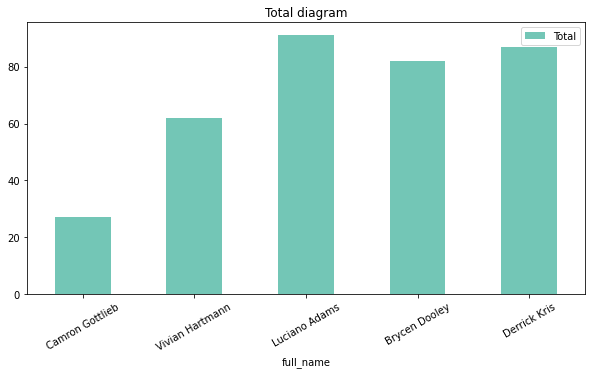

In [68]:
df1["Total"] = df1[column_list].sum(axis=1)
display(df1)
df1.plot(x='full_name', y="Total", kind='bar', title="Total diagram", figsize=(10, 5), rot=30, color='#73C6B6');

3. Вважаючи, що максимально можливий результат в ’Total’ 100 балiв,<br>
додати колонку з оцiнками у болонськiй системi.<br>

In [69]:
def bolon(i):
    if i < 51:
        return 'F'
    elif i >= 51 and i < 61:
        return 'E'
    elif i >= 61 and i < 71:
        return 'D'
    elif i >= 71 and i < 81:
        return 'C'
    elif i >= 81 and i < 90:
        return 'B'
    elif i >= 90:
        return 'A'
        
df1['Bologne'] = df1.apply(lambda x: bolon(x['Total']), axis=1)
df1

,full_name,Task01,Task02,Task03,Task04,Task05,Total,Bologne
0,Camron Gottlieb,8,1,3,1,14,27,F
1,Vivian Hartmann,7,17,19,3,16,62,D
2,Luciano Adams,19,34,10,5,23,91,A
3,Brycen Dooley,9,19,15,18,21,82,B
4,Derrick Kris,14,20,13,21,19,87,B


4. Отримати список студентiв iз заданою з вiджета оцiнкою, впорядко-<br>
ваний за балами.<br>

In [70]:
def task4(bolon):
    df4 = df1[df1["Bologne"] == bolon]
    if df4.empty:
        print('DataFrame is empty!')
    else:
        df4 = df4.sort_values("Total", ascending=False)
        df4 = df4.loc[:, ['full_name', "Total"]]
        display(df4)

interact(task4, bolon=["A", "B", "C", "D", "E", "F"]);

interactive(children=(Dropdown(description='bolon', options=('A', 'B', 'C', 'D', 'E', 'F'), value='A'), Output…

5. Для студента, прiзвище та iм’я якого вибрано з випадаючого списку,<br>
отримати найменший та найбiльший поточний результати i назви вiдповiд-<br>
них завдань.<br>

In [71]:
def task5(full_name):
    df5 = df1[df1['full_name'] == full_name]
    maximum_task = df5[column_list].idxmax(axis=1).item()
    minimum_task = df5[column_list].idxmin(axis=1).item()
    print('Maximum result was on Task:', maximum_task, 'and result was', df5[maximum_task].item())
    print('Minimum result was on Task:', minimum_task, 'and result was', df5[minimum_task].item())

interact(task5, full_name=list(students['full_name']));

interactive(children=(Dropdown(description='full_name', options=('Camron Gottlieb', 'Vivian Hartmann', 'Lucian…

# Withoun Pandas

In [72]:
class Validation:
    """Class for Validation representation."""

    @staticmethod
    def validateStr(func):
        def validateStrWrapper(w, value):
            if not(isinstance(value, str)):
                raise TypeError('must be an str')
            return func(w, value)
        return validateStrWrapper

    @staticmethod
    def validateAmount(func):
        def validateAmountWrapper(w, value):
            if not(isinstance(value, int)):
                try:
                    value = int(value)
                except TypeError:
                    raise TypeError('must be an int')
            if value < 0:
                raise ValueError("mast be positive")
            return func(w, value)
        return validateAmountWrapper


In [73]:
class Student:
    """Class for Student representation."""
    
    def __init__(self, student_name, student_last_name, student_number):
        self.student_name = student_name
        self.student_last_name = student_last_name
        self.student_number = student_number
        
    @property
    def student_name(self):
        return self._student_name

    @student_name.setter
    @Validation.validateStr
    def student_name(self, value):
        self._student_name = value
        
    @property
    def student_last_name(self):
        return self._student_last_name

    @student_last_name.setter
    @Validation.validateStr
    def student_last_name(self, value):
        self._student_last_name = value
        
    @property
    def student_number(self):
        return self._student_number

    @student_number.setter
    @Validation.validateAmount
    def student_number(self, value):
        self._student_number = value

    def full_name(self):
        return self.student_name + " " + self.student_last_name

        
    def __str__(self):
        return f"\nstudent_name: {self.student_name}\
                 \nstudent_number: {self.student_number}\
                 \nstudent_last_name: {self.student_last_name}"

    def __repr__(self):
        return f"\nstudent_name: {self.student_name}\
                 \nstudent_number: {self.student_number}\
                 \nstudent_last_name: {self.student_last_name}"

In [74]:
class Test:
    """Class for Test representation."""
    
    def __init__(self, test_name, student_number, points):
        self.test_name = test_name
        self.student_number = student_number
        self.points = points

    @property
    def test_name(self):
        return self._test_name

    @test_name.setter
    @Validation.validateStr
    def test_name(self, value):
        self._test_name = value
        
    @property
    def student_number(self):
        return self._student_number

    @student_number.setter
    @Validation.validateAmount
    def student_number(self, value):
        self._student_number = value

    @property
    def points(self):
        return self._points

    @points.setter
    @Validation.validateAmount
    def points(self, value):
        self._points = value

    def __str__(self):
        return f"\nstudent_number: {self.student_number}\
                 \npoints: {self.points}\
                 \ntest_name: {self.test_name}"

    def __repr__(self):
        return f"\nstudent_number: {self.student_number}\
                 \npoints: {self.points}\
                 \ntest_name: {self.test_name}"

In [75]:
def read_csv_file(file_name, t, objects, t_name=None):  
    with open(file_name, 'r') as v:
        r = csv.reader(v)
        next(r)
        for row in r:
            try:
                if not t_name:
                    objects.append(t(*row))
                else:
                    objects.append(t(t_name, *row))
            except Exception as e:
                print(f'{file_name}:\nline - {len(objects)}: {e}')
                continue

In [76]:
students = []
tests = []

read_csv_file("students.csv", Student, students)
read_csv_file("Task01.csv", Test, tests, "Task01")
read_csv_file("Task02.csv", Test, tests, "Task02")
read_csv_file("Task03.csv", Test, tests, "Task03")
read_csv_file("Task04.csv", Test, tests, "Task04")
read_csv_file("Task05.csv", Test, tests, "Task05")


students, tests

([
  student_name: Camron                 
  student_number: 1                 
  student_last_name: Gottlieb,
  
  student_name: Vivian                 
  student_number: 2                 
  student_last_name: Hartmann,
  
  student_name: Luciano                 
  student_number: 3                 
  student_last_name: Adams,
  
  student_name: Brycen                 
  student_number: 4                 
  student_last_name: Dooley,
  
  student_name: Derrick                 
  student_number: 5                 
  student_last_name: Kris],
 [
  student_number: 1                 
  points: 8                 
  test_name: Task01,
  
  student_number: 2                 
  points: 7                 
  test_name: Task01,
  
  student_number: 3                 
  points: 19                 
  test_name: Task01,
  
  student_number: 4                 
  points: 9                 
  test_name: Task01,
  
  student_number: 5                 
  points: 14                 
  test_name: Task01,

1. Побудувати загальний DataFrame з колонками<br>
’Student’, ’Task01’,’Task02’,’Task03’, ...,’Task0N’.<br>
1а. Для колонки, назва якої вибрана з випадаючого списку, отримати<br>
рейтинг студентiв.<br>
1б. Для колонки, назва якої вибрана з випадаючого списку, побудувати<br>
дiаграму результатiв.<br>
1в. Для колонки, назва якої вибрана з випадаючого списку, отримати<br>
середнє значення результатiв.<br>

In [77]:
d = {}
for student in students:
    d[student.full_name()] = {}
    for t in tests:
        if student.student_number == t.student_number:
            d[student.full_name()][t.test_name] = t.points

for (k, v) in d.items():
    print(k, ":")
    for (kk, vv) in v.items():
        print(f'\t{kk} - {vv}')
    print()



Camron Gottlieb :
	Task01 - 8
	Task02 - 1
	Task03 - 3
	Task04 - 1
	Task05 - 14

Vivian Hartmann :
	Task01 - 7
	Task02 - 17
	Task03 - 19
	Task04 - 3
	Task05 - 16

Luciano Adams :
	Task01 - 19
	Task02 - 34
	Task03 - 10
	Task04 - 5
	Task05 - 23

Brycen Dooley :
	Task01 - 9
	Task02 - 19
	Task03 - 15
	Task04 - 18
	Task05 - 21

Derrick Kris :
	Task01 - 14
	Task02 - 20
	Task03 - 13
	Task04 - 21
	Task05 - 19



In [78]:
def draw_histogram(x, y, x_label, y_label, title): 
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.bar(x, y, color='#EB984E', width=0.5, edgecolor='#154360')
    ax.set_title(title, color='black', size=50, fontweight='bold', pad=30)
    ax.set_ylabel(y_label, size=25, fontweight='bold')
    ax.set_xlabel(x_label, size=24, fontweight='bold')
    ax.tick_params(axis='x', rotation=70, direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.tick_params(axis='y', direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.patch.set_facecolor('#FCF3CF')
    fig.patch.set_facecolor('#73C6B6')         
    plt.show()

In [79]:
column_list = set(map(lambda k: k.test_name, tests))

def task1(task, plot=False, mid=False):
    t = sorted(list(filter(lambda k: k.test_name == task, tests)), key = lambda k: k.points, reverse=True)
    dd = {}
    for i in t:
        name = next(filter(lambda k: k.student_number == i.student_number, students))
        dd[name.full_name()] = i.points
    for (k, v) in dd.items():
        print(f"{k} - {v}")

    if plot:
        draw_histogram(list(dd.keys()), list(dd.values()), "Students", "Points", task)
    if mid:
        print('Mean value:', sum(list(dd.values()))/len(dd))

interact(task1, task=column_list);

interactive(children=(Dropdown(description='task', options=('Task03', 'Task05', 'Task02', 'Task04', 'Task01'),…

2. Додати до датафрейму колонку ’Total’ iз сумою результатiв.<br>
2а. Побудувати дiаграму результатiв для ’Total’.<br>

Camron Gottlieb :
	Task01 - 8
	Task02 - 1
	Task03 - 3
	Task04 - 1
	Task05 - 14
	Total - 27

Vivian Hartmann :
	Task01 - 7
	Task02 - 17
	Task03 - 19
	Task04 - 3
	Task05 - 16
	Total - 62

Luciano Adams :
	Task01 - 19
	Task02 - 34
	Task03 - 10
	Task04 - 5
	Task05 - 23
	Total - 91

Brycen Dooley :
	Task01 - 9
	Task02 - 19
	Task03 - 15
	Task04 - 18
	Task05 - 21
	Total - 82

Derrick Kris :
	Task01 - 14
	Task02 - 20
	Task03 - 13
	Task04 - 21
	Task05 - 19
	Total - 87



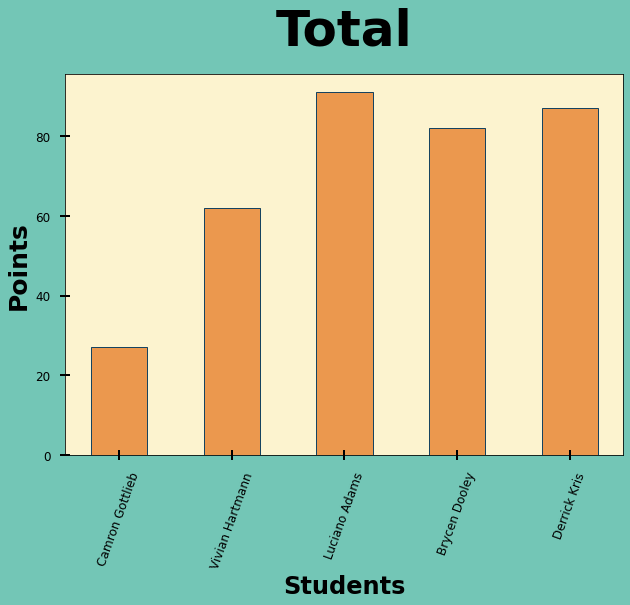

In [80]:
for (k, v) in d.items():
    d[k]["Total"] = sum(list(v.values()))

for (k, v) in d.items():
    print(k, ":")
    for (kk, vv) in v.items():
        print(f'\t{kk} - {vv}')
    print()   

draw_histogram(list(d.keys()), list(d[k]["Total"] for (k, v) in d.items()), "Students", "Points", "Total")


3. Вважаючи, що максимально можливий результат в ’Total’ 100 балiв,<br>
додати колонку з оцiнками у болонськiй системi.<br>

In [81]:
for (k, v) in d.items():
    d[k]["bolon"] = bolon(d[k]["Total"])

for (k, v) in d.items():
    print(k, ":")
    for (kk, vv) in v.items():
        print(f'\t{kk} - {vv}')
    print()   


Camron Gottlieb :
	Task01 - 8
	Task02 - 1
	Task03 - 3
	Task04 - 1
	Task05 - 14
	Total - 27
	bolon - F

Vivian Hartmann :
	Task01 - 7
	Task02 - 17
	Task03 - 19
	Task04 - 3
	Task05 - 16
	Total - 62
	bolon - D

Luciano Adams :
	Task01 - 19
	Task02 - 34
	Task03 - 10
	Task04 - 5
	Task05 - 23
	Total - 91
	bolon - A

Brycen Dooley :
	Task01 - 9
	Task02 - 19
	Task03 - 15
	Task04 - 18
	Task05 - 21
	Total - 82
	bolon - B

Derrick Kris :
	Task01 - 14
	Task02 - 20
	Task03 - 13
	Task04 - 21
	Task05 - 19
	Total - 87
	bolon - B



4. Отримати список студентiв iз заданою з вiджета оцiнкою, впорядко-<br>
ваний за балами.<br>

In [82]:
def task4(bolon):
    ddd = {k: v for k, v in d.items() if v["bolon"] == bolon}
    
    if not ddd:
         print('DataFrame is empty!')
    else:
        ddd = dict(sorted(ddd.items(), key=lambda x: x[1]["Total"], reverse=True))
        for (k, v) in ddd.items():
            suma = v["Total"]
            print(f"{k} - {suma}")

interact(task4, bolon=["A", "B", "C", "D", "E", "F"]);

interactive(children=(Dropdown(description='bolon', options=('A', 'B', 'C', 'D', 'E', 'F'), value='A'), Output…

5. Для студента, прiзвище та iм’я якого вибрано з випадаючого списку,<br>
отримати найменший та найбiльший поточний результати i назви вiдповiд-<br>
них завдань.<br>

In [83]:
def task5(full_name):
    full_name = full_name.copy()
    full_name.pop("Total", None) 
    full_name.pop("bolon", None) 
    maximum_task = max(full_name, key=full_name.get)
    minimum_task = min(full_name, key=full_name.get)
    print('Maximum result was on Task:', maximum_task, 'and result was', full_name[maximum_task])
    print('Minimum result was on Task:', minimum_task, 'and result was', full_name[minimum_task])

interact(task5, full_name=d);

interactive(children=(Dropdown(description='full_name', options={'Camron Gottlieb': {'Task01': 8, 'Task02': 1,…